Test RMSE: 9.745


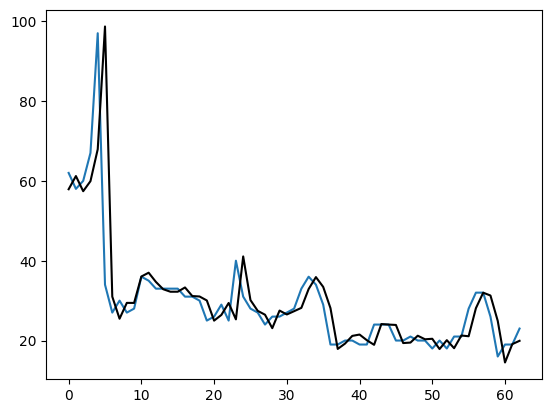

In [3]:
# Importing libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd

# Reading data
df = pd.read_csv("https://codefinity-content-media.s3.eu-west-1.amazonaws.com/943e906e-4de6-4694-a1df-313ceed7cfe7/pr_air_quality.csv")

# Preparing data
X = df["value"].values
size = int(len(X) * 0.97)
train, test = X[0:size], X[size:]
history = train.tolist()
predictions = list()

# Making foreasts with ARIMA model using a `for` loop
for t in range(len(test)):
  model = ARIMA(history, order=(5, 1, 0))
  model_fit = model.fit()
  output = model_fit.forecast()
  predictions.append(output[0])
  history.append(test[t])

# Calculate MSE error
rmse = sqrt(mean_squared_error(test, predictions))
print("Test RMSE: %.3f" % rmse)

# Visualize results
plt.plot(test)
plt.plot(predictions, color="black")
plt.show()


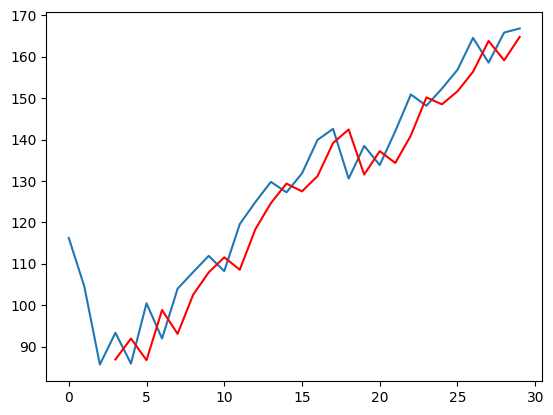

In [7]:
# Importing libraries
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd

# Read dataset and use "Open" column as X
df = pd.read_csv("https://codefinity-content-media.s3.eu-west-1.amazonaws.com/943e906e-4de6-4694-a1df-313ceed7cfe7/aapl.csv")
X = df["Open"].values

# Train autoregression (use lags=3)
model = AutoReg(X, lags=3, old_names=False)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=0, end=30, dynamic=False)

# Visualize results
plt.plot(X[:30])
plt.plot(predictions[:30], color="red")
plt.show()

# # Calculate MSE error
# rmse = sqrt(mean_squared_error(X[:28], predictions))
# print("Test RMSE: %.3f" % rmse)

# *Examples of Non-Stationary Time Series*

Як ви вже знаєте, основна відмінність між нестаціонарними та стаціонарними даними полягає в тому, що перші мають зміну властивостей часу, таких як середнє, дисперсія або коваріаційна функція.

Прикладами нестаціонарних процесів є випадкові блукання з дрейфом або без нього (повільна, стійка зміна) і детерміновані тенденції (тенденції, які є постійними, позитивними або негативними, не залежать від часу протягом усього життя ряду).

Прикладом нестаціонарного часового ряду є запис показників атмосферної температури, які вимірюються кожні 10 секунд. У будь-який момент часу середнє значення дорівнює справжній температурі. З іншого боку, середнє значення змінюється з часом - так само, як справжня температура змінюється з часом.

Крім того, дані про міжнародні авіарейси є прикладом нестаціонарного часового ряду. Кількість пасажирів на окремих маршрутах змінюється в залежності від сезону.

Приклади нестаціонарних даних:

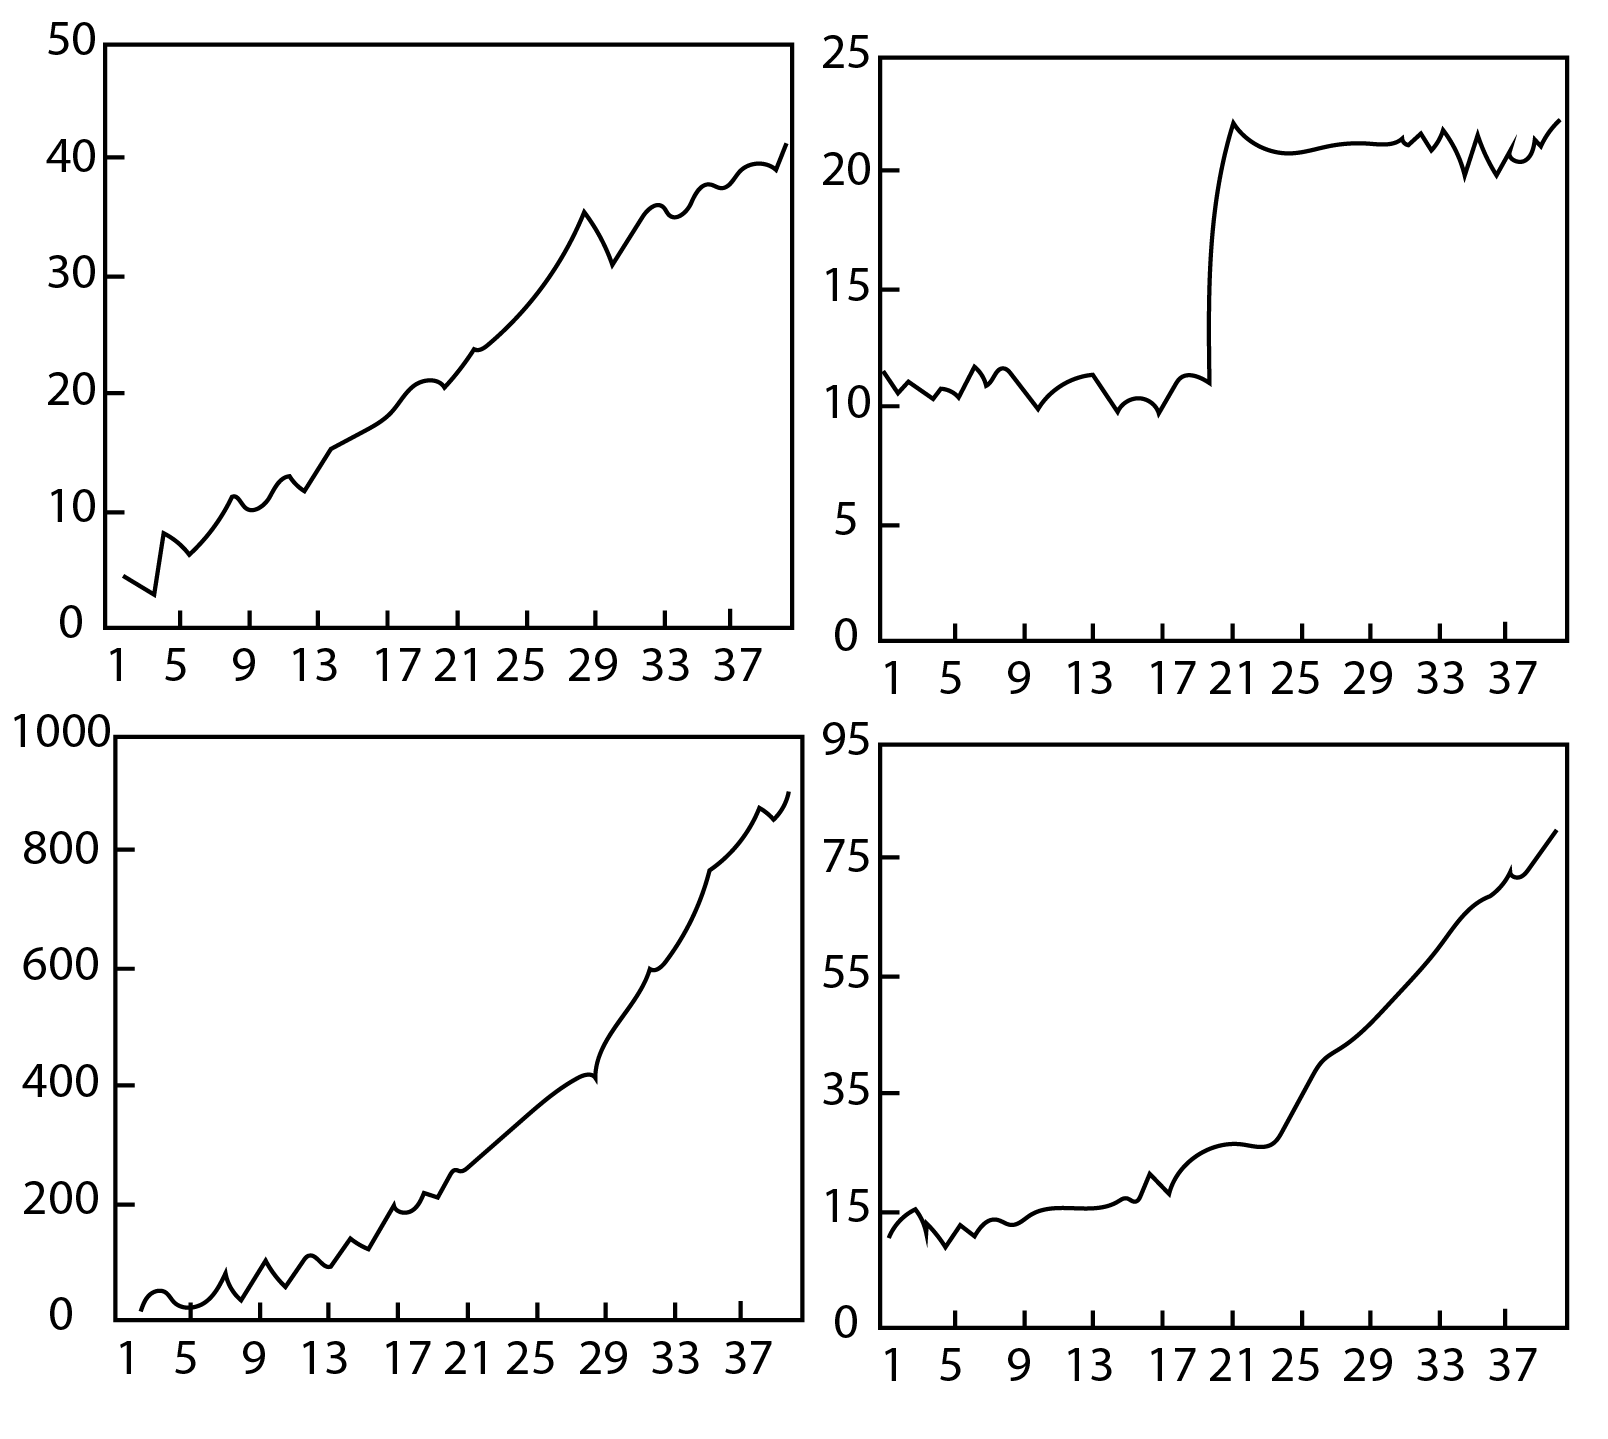

# *Convert Non-Stationary Data to Stationary*

Отже, переходимо до етапу обробки нестаціонарних даних. Ви вже бачили прогностичні моделі, які можна використовувати для роботи зі стаціонарними даними, але оскільки більшість даних є нестаціонарними, існують способи їх перетворення.

Існує багато типів перетворень, таких як різниця, логарифмічне перетворення, пропорційна зміна тощо. Але основна ідея математичних перетворень полягає в застосуванні певної функції для кожного значення часового ряду, щоб усунути залежність від часу (це включає тренди та сезонність) .

Ми почнемо з різниці, яка використовується в моделі ARIMA. Принцип простий - минуле значення віднімається від поточного:

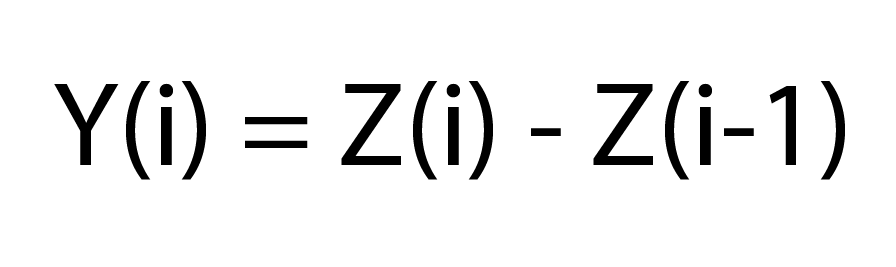

Це дозволяє стабілізувати значення часового ряду, роблячи його більш постійним. Давайте реалізуємо різницеве ​​перетворення за допомогою Python:

In [ ]:
# dataset["diff_1"] = dataset["Open"].diff(periods=1).dropna()

Переходимо до логарифмічного перетворення. Якщо різниця дозволяє вирівняти середнє, то логарифмічне перетворення стабілізує дисперсію часового ряду. Єдине обмеження полягає в тому, що логарифмічне перетворення може працювати лише з додатними значеннями.

Нижче наведено код для логарифмічного перетворення:

In [ ]:
# import numpy as np

# dataset["log"] = np.log(dataset["Open"])

In [1]:
# Importing the library
import pandas as pd

# Read dataset
df = pd.read_csv("https://codefinity-content-media.s3.eu-west-1.amazonaws.com/943e906e-4de6-4694-a1df-313ceed7cfe7/AirPassengers.csv")

# Drop "Month" column
df = df.drop("Month", axis=1)

# Print the mean of ‘#Passengers’ column
print("Mean before: %f" % df["#Passengers"].mean())

# Use differencing method and print new mean value
df["#Passengers"] = df["#Passengers"].diff(periods=1).dropna()
print("Mean after: %f" % df["#Passengers"].mean())

Mean before: 280.298611
Mean after: 2.237762


ADF Statistic: -2.118698
p-value: 0.237063


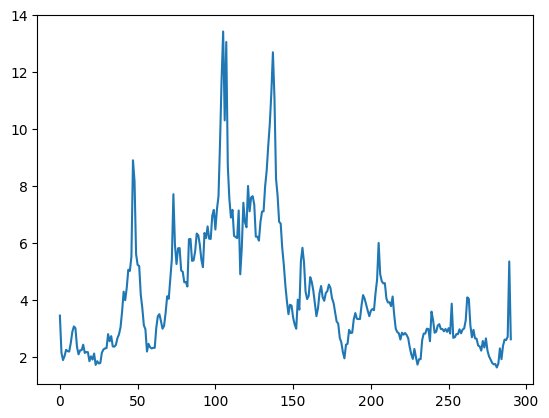

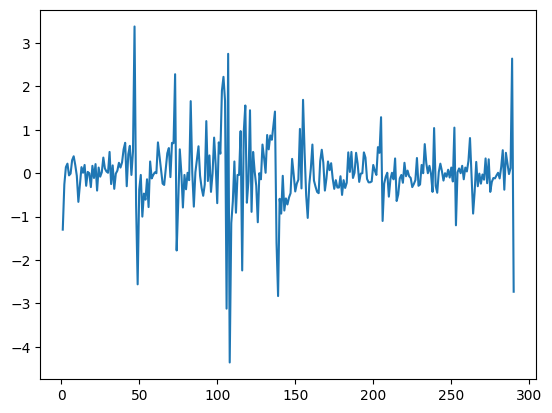

ADF Statistic: -7.611421
p-value: 0.000000


In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Reading dataset
df = pd.read_csv("https://codefinity-content-media.s3.eu-west-1.amazonaws.com/943e906e-4de6-4694-a1df-313ceed7cfe7/pr_HH+Spot+Price.csv")

# Make ADF Test
result = adfuller(df["Price"].values, autolag="AIC")
print("ADF Statistic: %f" % (result[0]))
print("p-value: %f" % (result[1]))

# Visualizing dataset
plt.plot(df['Price'])
plt.show()

# Use differencing method
new_diff = df["Price"].diff(periods=1).dropna()

# Plot stationary data
plt.plot(new_diff)
plt.show()

# Remake ADF test
new_result = adfuller(new_diff.values, autolag="AIC")
print("ADF Statistic: %f" % (new_result[0]))
print("p-value: %f" % (new_result[1]))

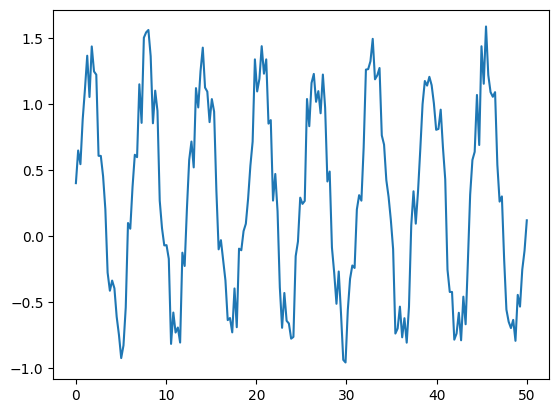

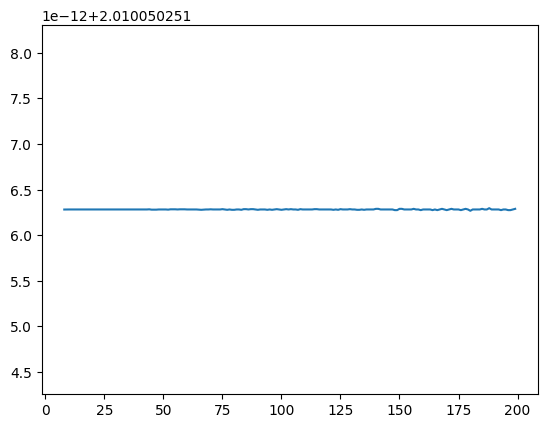

In [3]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd

# Reading dataset
df = pd.read_csv("https://codefinity-content-media.s3.eu-west-1.amazonaws.com/943e906e-4de6-4694-a1df-313ceed7cfe7/Seasonality+Time+Series.csv")

# Plot dataset before differencing
plt.plot(df["Var"], df["Date"])
plt.show()

# Use differencing method
df_diff = pd.DataFrame(df["Var"]).diff(8)

# Plot dataset after differencing
plt.plot(df_diff)
plt.show()

# Weather Forecasting

Звучить досить звично, але прогнозування погоди – одне з найскладніших завдань, яке враховує багато факторів.

Найпростіші моделі, які ми вивчали раніше, часто використовуються в більш модифікованому вигляді. Наприклад, це такі моделі, як сезонна авторегресійна авторегресійна інтегрована ковзаюча середня Бокса-Дженкінса та Холта-Уінтерса, авторегресійна інтегрована ковзна середня із зовнішніми регресорами у вигляді членів Фур’є.

При прогнозуванні погоди, крім температури, можна враховувати параметри зони навколишнього середовища, широти і довготи.

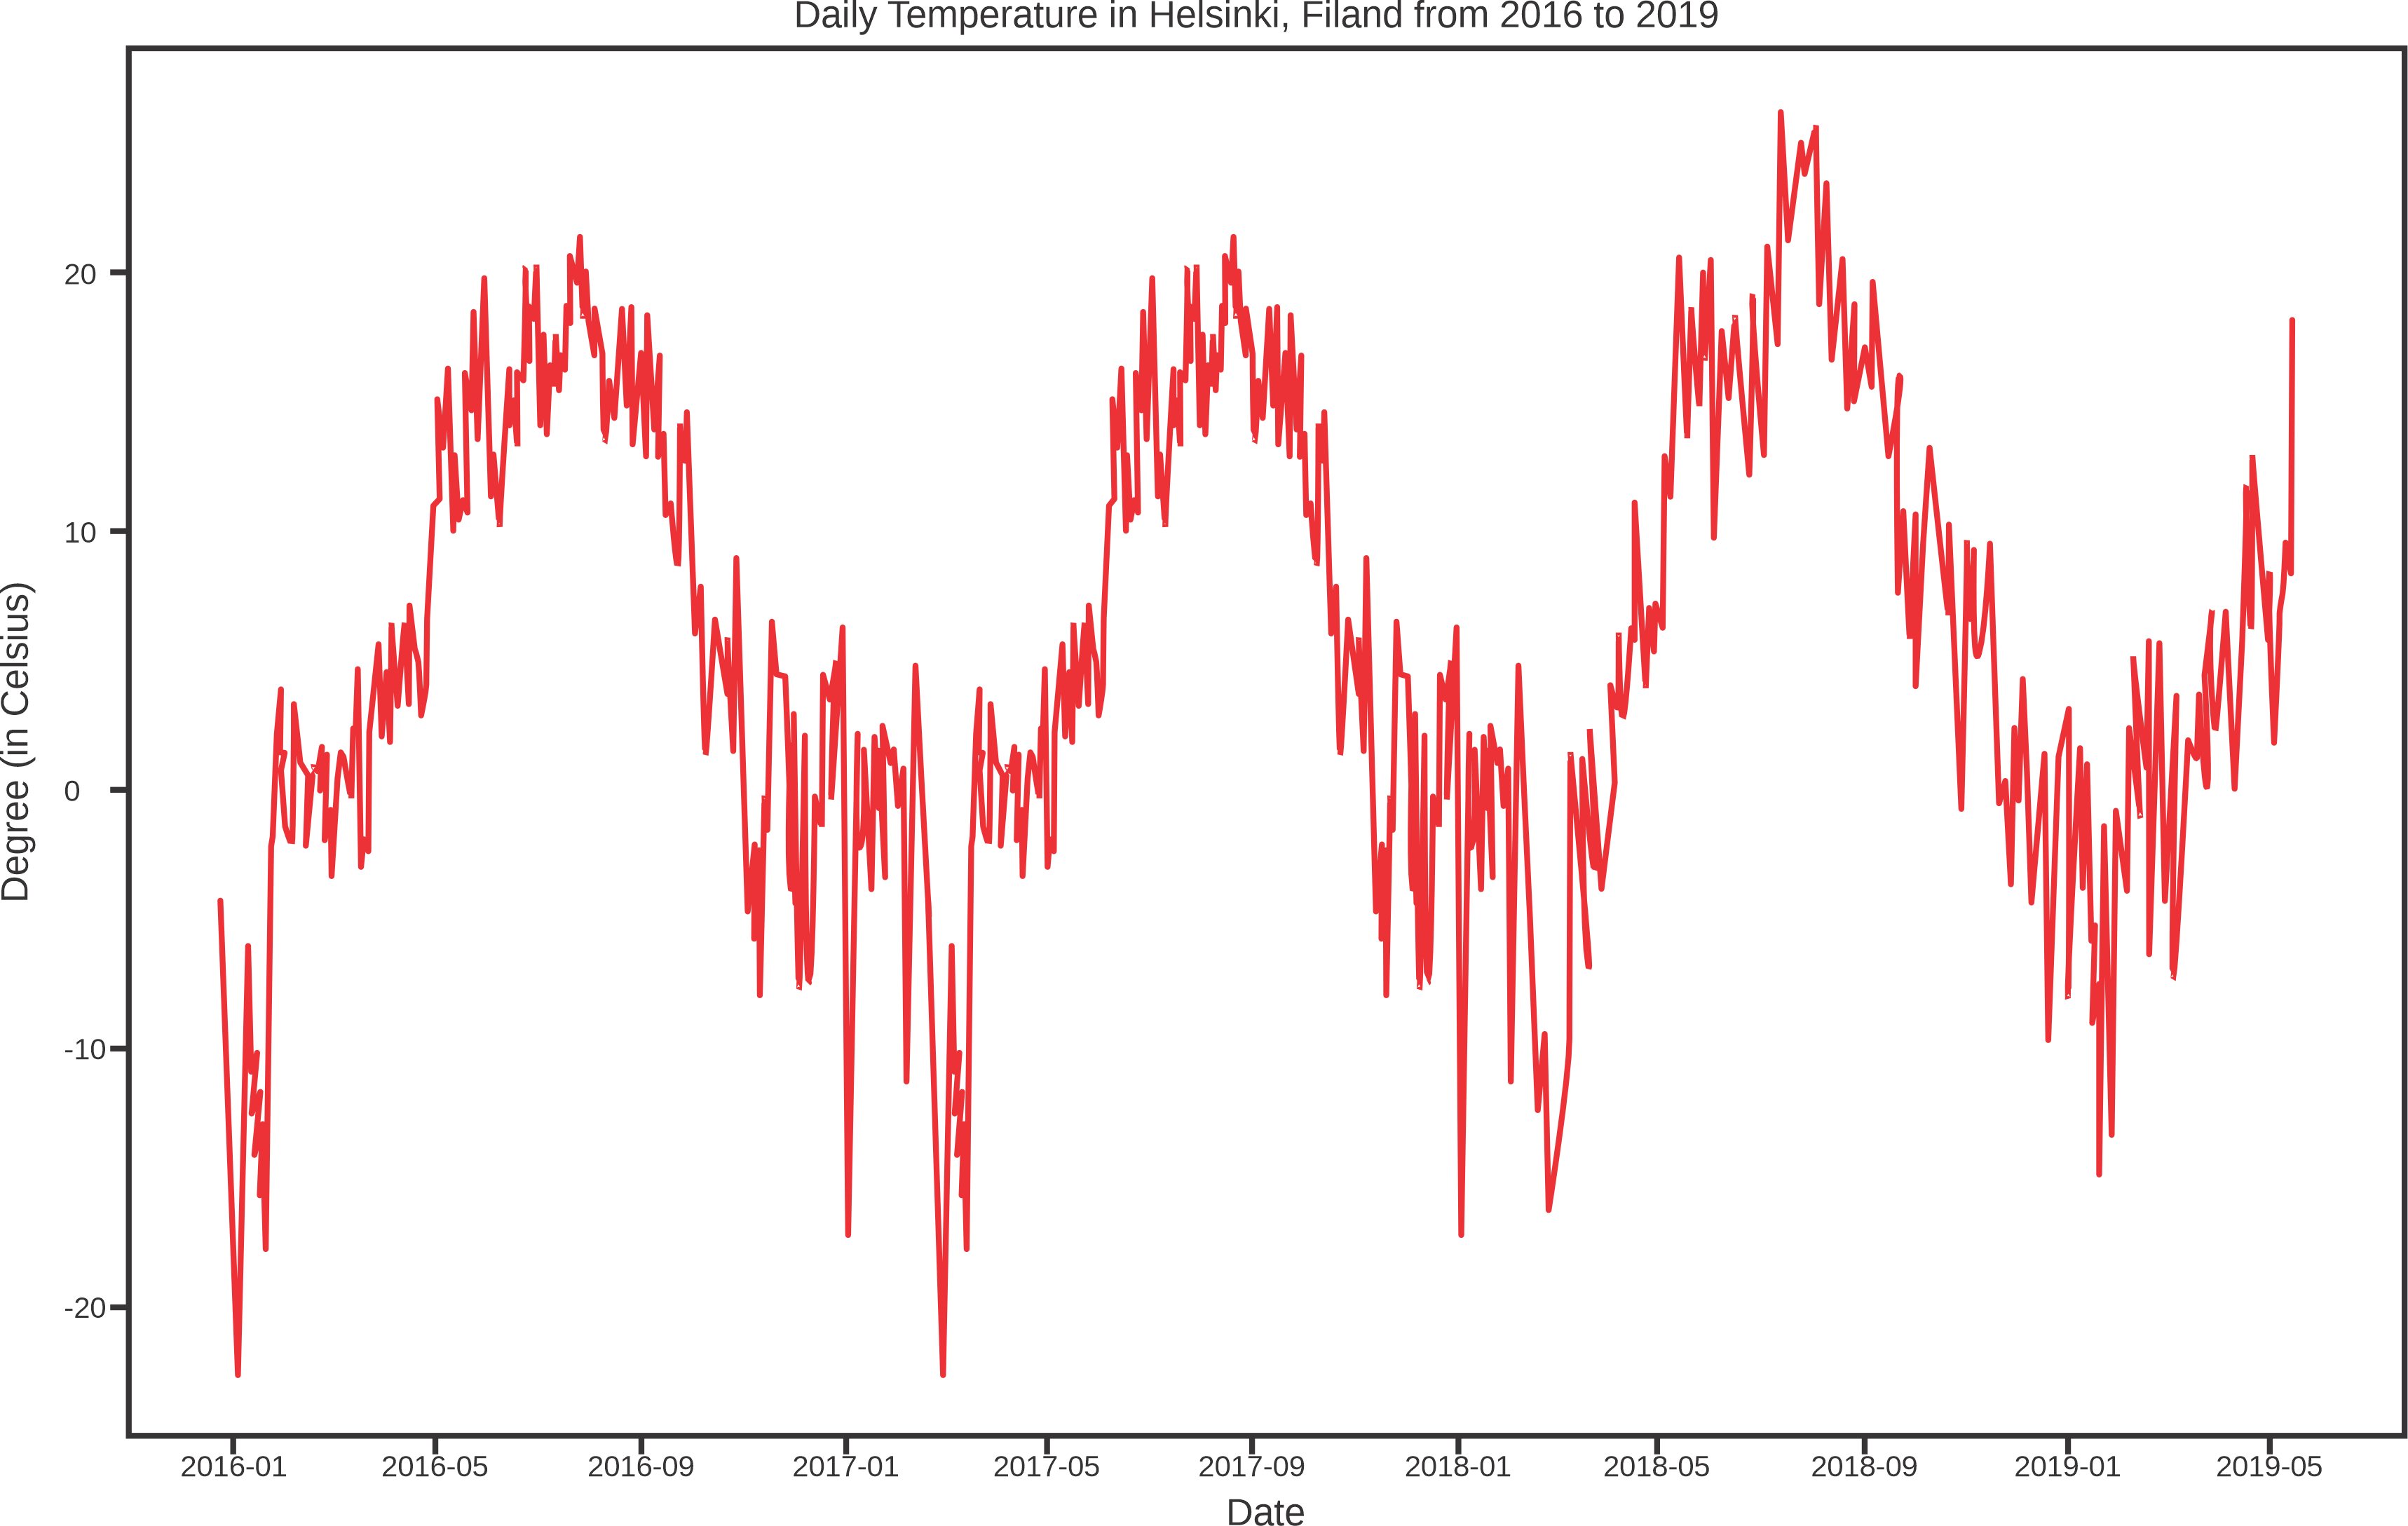

Основною характеристикою таких даних є сезонність; відповідно до цього - можна вибрати найбільш підходящу модель.

Ефективність прогнозу погоди також залежить від обраного вами терміну. На даний момент в короткострокових прогнозах моделі векторної авторегресії більш ефективні, ніж, наприклад, SARIMA.

# *Store Demand Forecast*

Як і в попередній задачі, зараз для прогнозування попиту використовуються трохи інші моделі, складніші за звичайну ARIMA. Який, наприклад? SARIMAX.

Ця модель дуже схожа на модель ARIMA, за винятком того, що є додатковий набір компонентів авторегресії та ковзного середнього.

Модель SARIMA дозволяє розрізняти дані за сезонною частотою, а також іншими несезонними відмінностями. Знати, які варіанти найкращі, можна легше за допомогою фреймворків автоматичного пошуку параметрів, таких як pmdarina.

Ви можете використовувати SARIMA з statsmodels:

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# model = SARIMAX(dataset, order=(1, 1, 1), freq="D")
# results = model.fit()

Ковзне середнє також можна використовувати для прогнозування попиту. Однак результати, які ми можемо отримати за допомогою цього методу, можуть перевершити навіть XGBoost (зменшує похибку на 32%). Але чого очікувати від такого простого способу?

У будь-якому випадку, ваше головне завдання при прогнозуванні часових рядів — оптимальний вибір розміру моделі (її обчислювальної продуктивності) і результатів, які вона може принести.

# *Financial Markets*

Прагнення передбачити фондовий ринок, ймовірно, почалося в той же час, що й сам фондовий ринок. Але, як ви вже знаєте, тепер ми можемо реалізувати цю «мрію» за допомогою прогностичних моделей.

Набори даних із записами фондового ринку передбачають аналіз трендів, циклічних коливань і сезонності. Наприклад, фондові ринки, як правило, добре працюють на початку року, оскільки саме тоді багато інвесторів мають свіжий капітал. Ціни на акції можуть зрости напередодні довгих вихідних і триденних свят. Це пов'язано виключно з людським фактором.

В основному, щоб передбачити запаси ринку, використовуються моделі, які працюють з даними, які мають множинну сезонність. Однією з найпопулярніших моделей є Prophet, створена компанією Meta. Математична модель виглядає так:

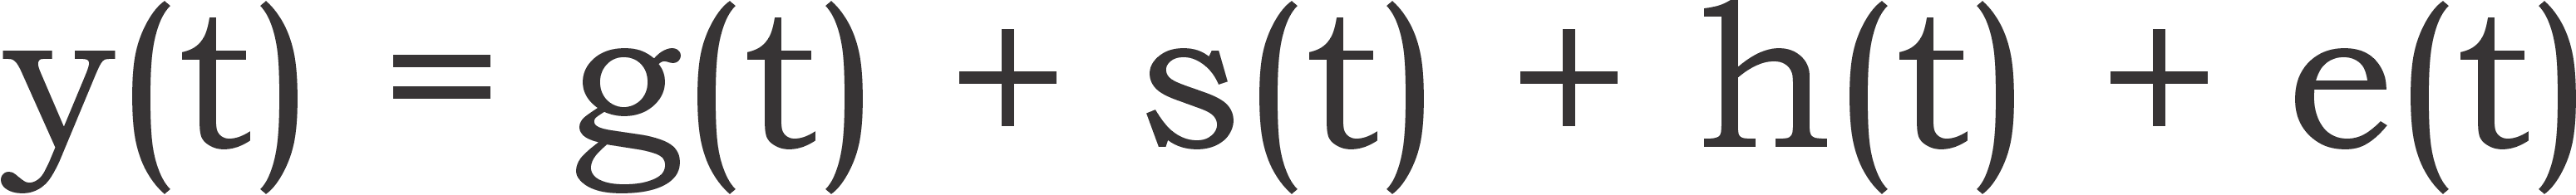

Рівняння включає параметри трендів g(t), сезонності s(t), свят h(t) і шуму e(t)

Ви можете експериментувати з моделлю на Python:

In [ ]:
# from prophet import Prophet

# model = Prophet()
# model.fit(df)

# *Predict the Emergence of Repeat Customers*

Чим відрізняється задача прогнозування поведінки споживачів від, наприклад, задачі прогнозування загального прибутку супермаркету?

Відповідь проста - це дані.

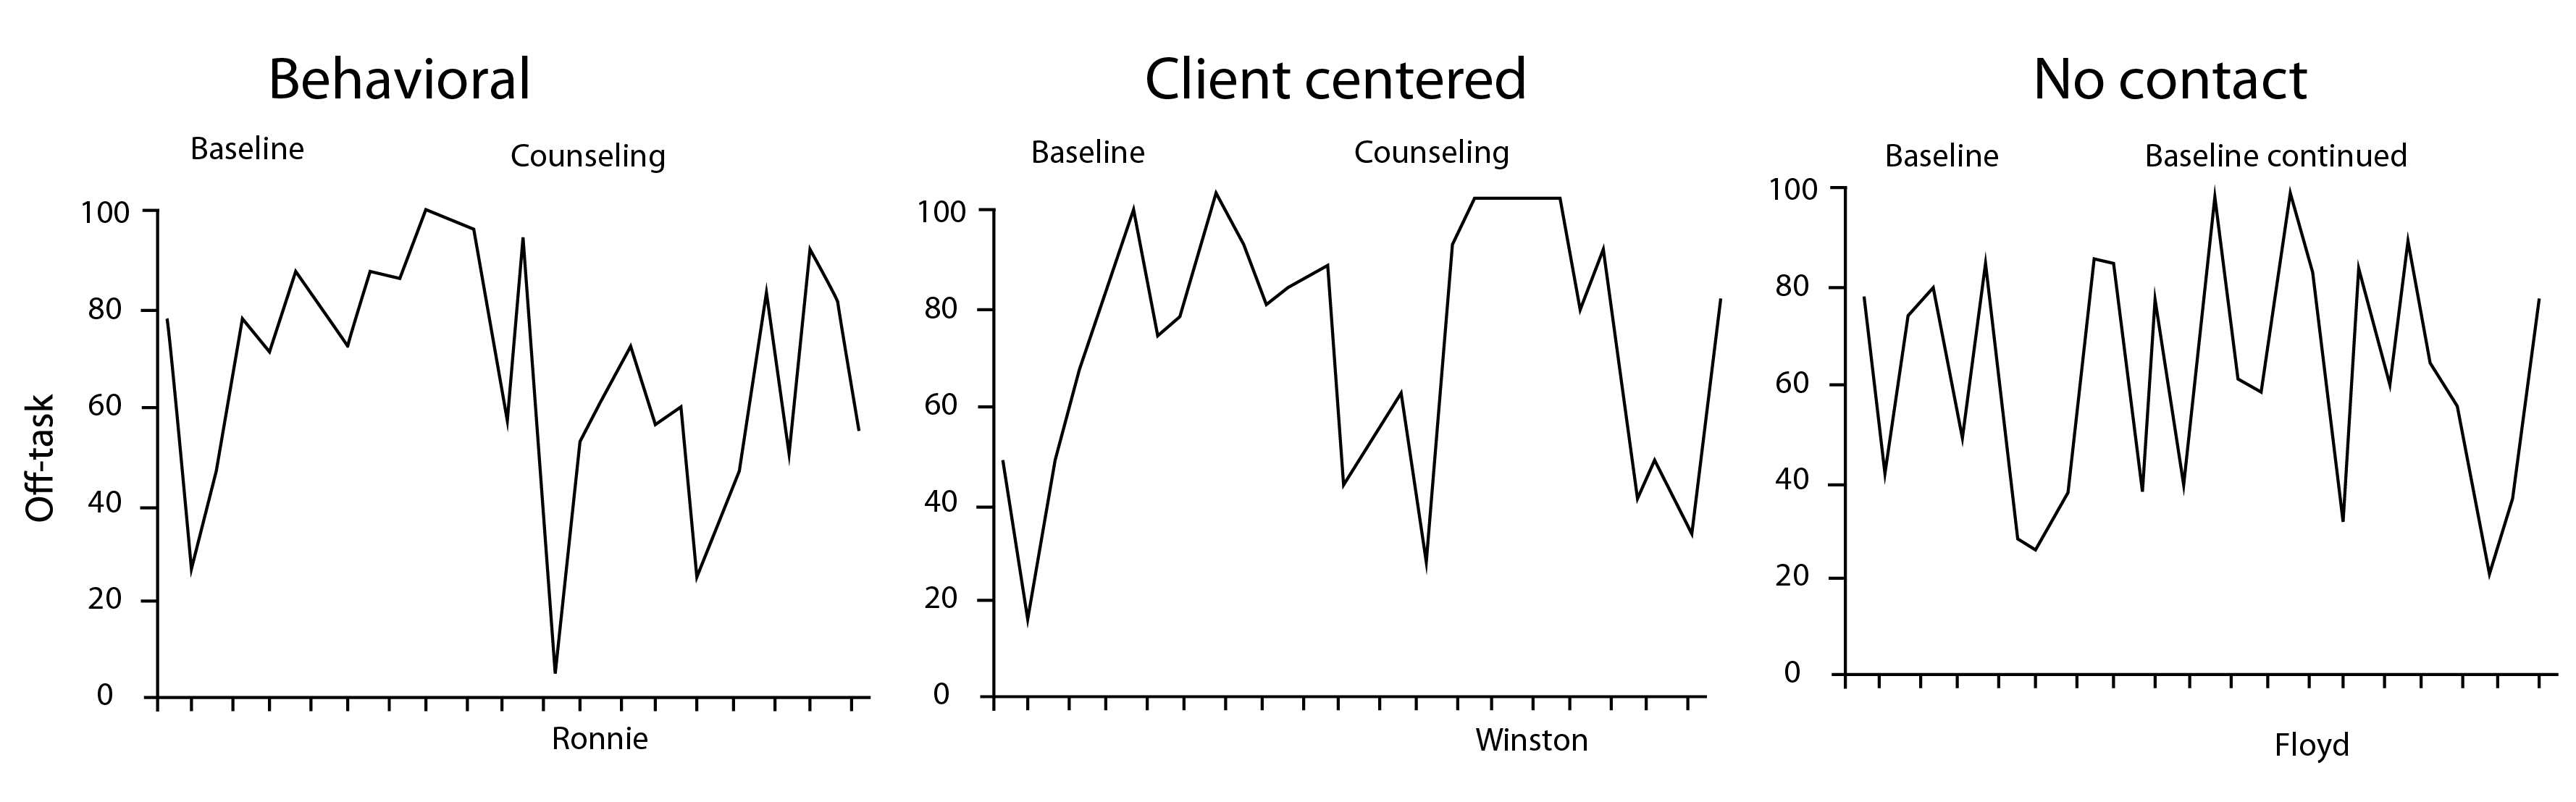

Щоб спрогнозувати поведінку клієнтів, необхідно «побудувати» прогнозні моделі для кожного з клієнтів, враховуючи найбільш загальні моделі поведінки всіх клієнтів. Що це означає для нас?

Справа в тому, що звичайна модель ARIMA може виявитися неефективною в цьому завданні. В даний час найбільш широко використовуються моделі нейронних мереж, такі як LSTM і Transformers.

Моделі нейронних мереж навчаються на всіх наших багатовимірних даних і будують «рівняння» (змінює параметри моделі), яке далі передбачає вхідні дані.

# *Medicine: EEG Forecasting*

І останнє завдання, яке ми розглянемо, це прогнозування сигналу ЕЕГ. Часові ряди в медицині - це дуже важливі дані, аналіз яких дозволяє вирішити багато проблем. Одним з них є аналіз сигналу ЕЕГ для прогнозування епілептичних нападів. У прикладі, який ми розглянемо, використовується прогностична модель ARIMA-GARCH.

Ми не будемо заглиблюватися в роботу цієї моделі в деталях, а лише згадаємо, що модель GARCH може охоплювати флет-період і період коливань часових рядів.

Обробка медичних тимчасових даних не відрізняється від звичайного алгоритму обробки даних: вам все одно потрібно видалити шум, заповнити відсутні дані та перетворити нестаціонарні дані на стаціонарні.

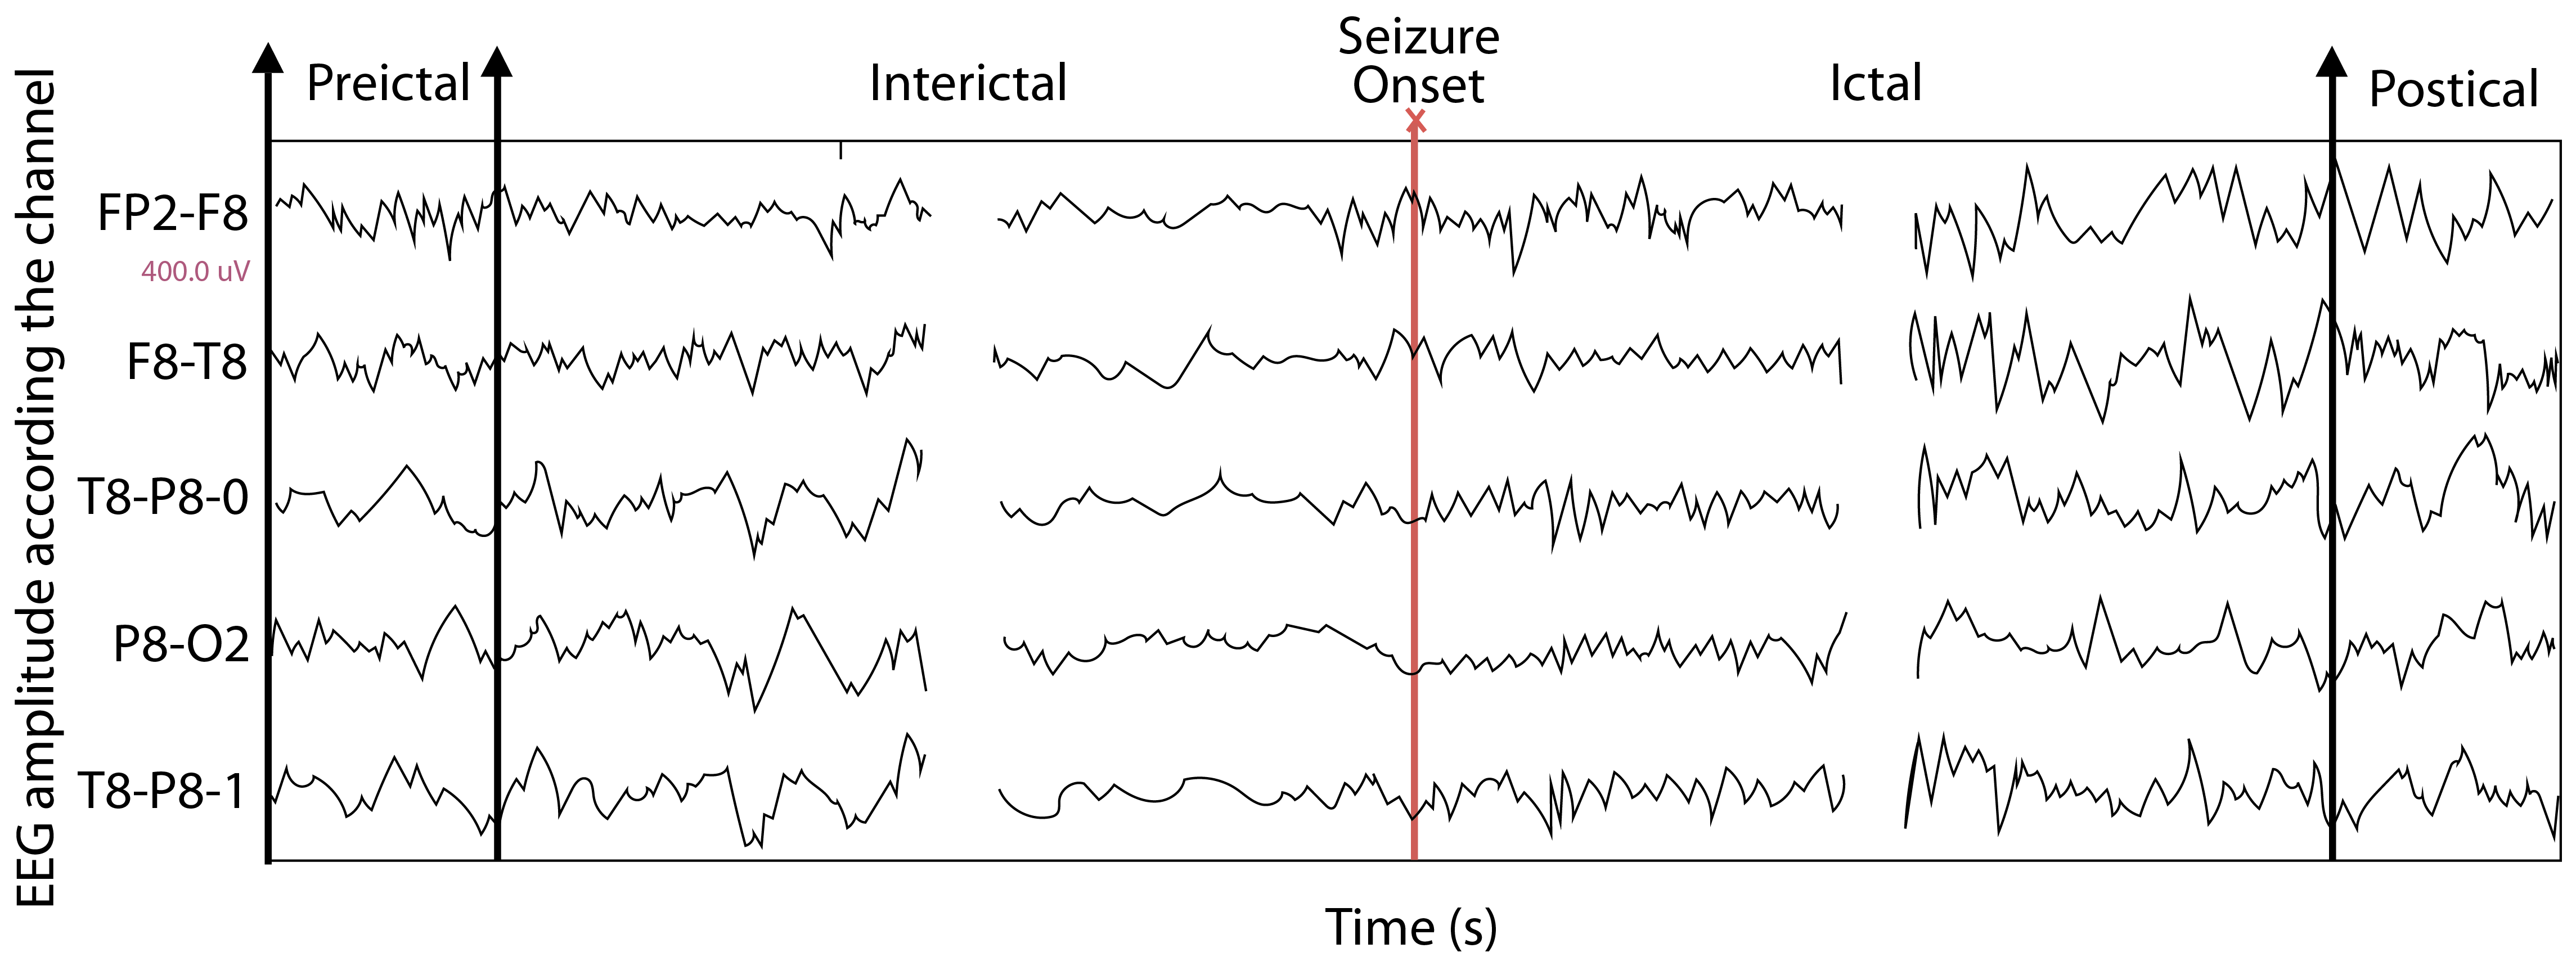

Цей невеликий розділ був присвячений короткому огляду різних проблем реального світу, для яких, як ви розумієте, такі моделі, як ковзне середнє, модель авторегресії та ARIMA, є лише початком. У майбутньому ці моделі будуть модифікуватися залежно від типу проблеми, і іноді вони взагалі недостатньо ефективні для вирішення певних проблем.